# Logistic Regression

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)

### Introduction

* Logistic Regression is one of the basic and popular algorithm to solve a classification problem. 


* It is named as ‘Logistic Regression’, because it’s underlying technique is quite the same as Linear Regression. 


* The term “Logistic” is taken from the Logit function that is used in this method of classification.


* Logistic Regression is used when the dependent variable(target) is categorical (you need to encode the categorical variable into a numeric value)


* For multi class problems you can use Multinomial Logistic Regression


### Where is it used?

Logistic Regression can be used for various classification problems such as 
1. Spam detection
2. Diabetes prediction
3. If a given customer will purchase a particular product
4. If a customer will churn to another competitor

### Why not use Linear Regression?

Consider an example of where we have data of tumor size vs its malignancy. As it is a classification problem that either a patient is maligant or not. If we plot, we can see, all the values will lie on 0 and 1. And if we fit best found regression line, by assuming the threshold at 0.5, the graph might look like below

<img src='images/logit1.png' alt='logit1' style="width: 500px;"/>

We can decide the point on the x axis from where all the values lie to its left side are considered as negative class and all the values lie to its right side are positive class.

<img src='images/logit2.jpeg' alt='logit2' style="width: 500px;"/>

But what if there is an outlier in the data. Things would get pretty messy. For example, for 0.5 threshold.

<img src='images/logit3.png' alt='logit3' style="width: 500px;"/>

If we fit best found regression line, it still won’t be enough to decide any point by which we can differentiate classes. It will put some positive class examples into negative class. The green dotted line (Decision Boundary) is dividing malignant tumors from benign tumors but the line should have been at a yellow line which is clearly dividing the positive and negative examples. So just a single outlier is disturbing the whole linear regression predictions. And that is where logistic regression comes into a picture.

### Logistic Regression

As discussed earlier, to deal with outliers, Logistic Regression uses Sigmoid function.
An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is a Sigmoid function, which takes any real value between zero and one.

Step functions enforce some threshold on a variable e.g.: discard anything below a certain value. 

$$u(x) \begin{cases} 0 & \mbox{if} & x < 0 \  \\ 1 & \mbox{if} & x \geq 0 \ \end{cases}$$

Step functions are like switches. We could utilise them to trigger a signal whenever a threshold is crossed. Imagine opening the floodgates whenever the water level crosses a certain point or turning of the electric lighting when the ambient light brightness exceeds a given measure.

Perceptrons, binary classifiers and the neurons in artificial neural networks require an activation function in order to produce any output. The step function is a valid option for the activation function but poses a challenge in analysis because of the jump disconuity at $x=0$.

At $x=0$ the derivative is undefined ($\frac{\infty}{0}$) while the derivative is zero for the remainder of the domain.

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

The sigmoid function $\sigma(x)$, because of its differentiability, is sometimes used as an alternative to the step function $u(x)$.

Some may choose to introduce a weight $\beta$ to the input variables in order to obtain a sigmoid curve more reminiscent of the step we're trying to mimic. By tweaking the $\beta$ term, one can obtain a result that approaches the step function, yet remains differentiable throughout its entire domain.

$$\sigma(x) = \frac{1}{1+e^{-x\beta}}$$


<img src='images/logit4.png' alt='logit4' style="width: 500px;"/>

### Properties of Logistic Regression:

* The dependent variable in logistic regression follows Bernoulli Distribution.


* Estimation is done through maximum likelihood.

### Maximum Likelihood Estimation (MLE)

The MLE is a "likelihood" maximization method, while OLS (used in Linear Regression) is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

### Types of Logistic Regression

Types of Logistic Regression:

**Binary Logistic Regression:** The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.

**Multinomial Logistic Regression:** The target variable has three or more nominal categories such as predicting the type of Wine.

**Ordinal Logistic Regression:** the target variable has three or more ordinal categories such as product rating from 1 to 5.

### Logistic Regression on Breast Cancer Data

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer['data'].shape

(569, 30)

In [4]:
X = cancer['data']
y = cancer['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

In [7]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[43,  1],
       [ 5, 94]])

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.958041958041958
Precision: 0.9894736842105263
Recall: 0.9494949494949495


### ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

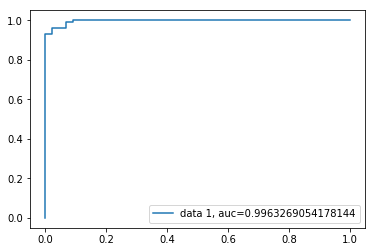

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

### Advantages

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

### Disadvantages

* Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. 

* Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. 

* Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.